In [2]:
import numpy as np
import pandas as pd
from scipy import linalg as LA
import matplotlib.pyplot as plt
import cv2

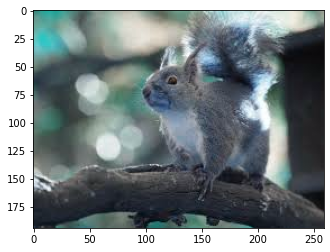

In [20]:
import matplotlib.image as mpimg
%matplotlib inline
org_img = cv2.imread("./drive/My Drive/ColabNotebooks/PRML/8章/1.jpg")
assert org_img is not None
plt.imshow(org_img)
plt.show()

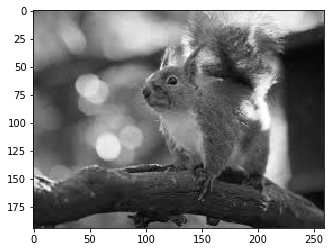

In [21]:
gray_img = cv2.cvtColor(org_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap="gray", interpolation="none")
plt.show()

[  0 255]


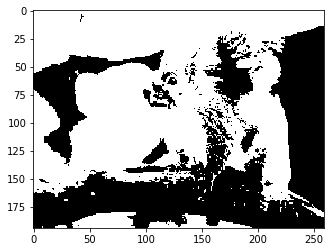

In [28]:
ret, binary_img = cv2.threshold(gray_img, 80, 255, cv2.THRESH_BINARY)
print(np.unique(binary_img))
plt.imshow(binary_img, cmap="gray", interpolation="none")
plt.show()

[-1  1]


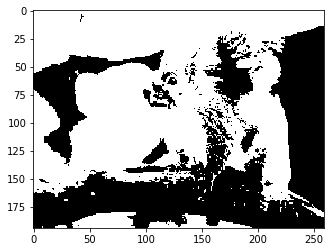

In [30]:
binary_img = np.where(binary_img == 255,1,binary_img)
binary_img = np.where(binary_img == 0, -1, binary_img)
print(np.unique(binary_img))
plt.imshow(binary_img, cmap="gray", interpolation="none")
plt.show()

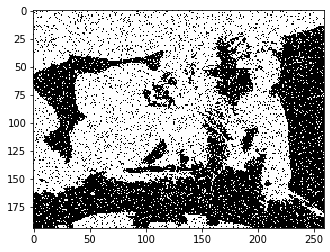

In [33]:
def noise(pixel):
  if pixel == -1:
    pixel = np.random.choice([-1,1], p=[0.1,0.9])
  else:
    pixel = np.random.choice([-1,1], p=[0.9,0.1])
  return pixel

noise_img = np.vectorize(noise)(binary_img)
plt.imshow(noise_img, cmap="binary", interpolation="none")
plt.show()

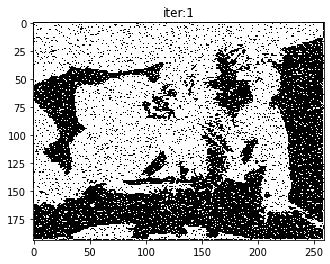

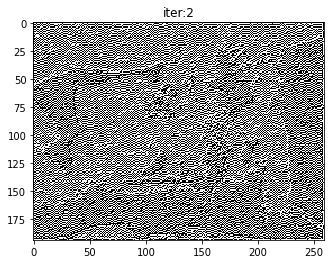

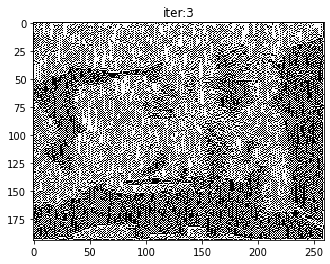

In [35]:
X = noise_img.copy()
Y = noise_img.copy()

def ICM(i,j):
  X[i,j] = 1
  posi = h*X.sum() - beta * X[i,j] * (X[i+1,j] + X[i, j+1] + X[i-1, j] + X[i, j+1]) - eta * (X * Y).sum()
  X[i,j] = -1
  nega = h*X.sum() - beta * X[i,j] * (X[i+1,j] + X[i, j+1] + X[i-1, j] + X[i, j+1]) - eta * (X * Y).sum()
  if posi < nega:
    X[i, j] = -1
  else:
    X[i, j] = 1

h = 0
beta = 1.
eta = 2.1

for k in range(3):
  for i in range(1, noise_img.shape[0]-1):
    for j in range(1, noise_img.shape[1]-1):
      ICM(i,j)
  plt.title(f"iter:{k+1}")
  plt.imshow(X, cmap="gray", interpolation="none")
  plt.show()

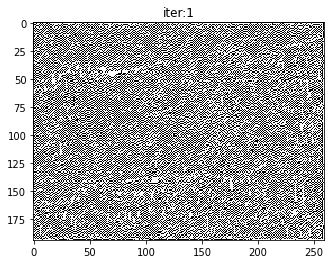

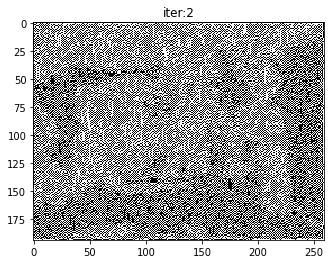

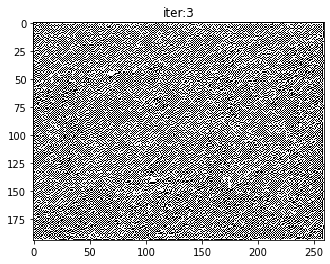

In [36]:
h = 0.3
beta = 1.
eta = 2.1

for k in range(3):
  for i in range(1, noise_img.shape[0]-1):
    for j in range(1, noise_img.shape[1]-1):
      ICM(i,j)
  plt.title(f"iter:{k+1}")
  plt.imshow(X, cmap="gray", interpolation="none")
  plt.show()